1. 5.7.2 절에서 TwoLayerNet 클래스에서 굵은 글씨로 표시된 부분이 세 군데 있다. 코드를 모두 옮겨
적고 각 문장들을 설명하는 주석을 간단히 첨부하시오.
(1) __init__ 함수 부분:
(2) predict 함수 부분:
(3) graident 함수 부분:


In [ ]:
def __init__(self, input_size, hidden_size, output_size,
    weight_init_std=0.01):
    # 가중치 초기화 w와 b를 각각초기화 함 w는 input*hidden 크기의 정규분포를 띈 난수 배열과 hidden*output의 배열리 리턴됨
    self.params = {}
    self.params['W1'] = weight_init_std * \
        np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * \
        np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    # 계층 생성
    #Affine은 w와 b의 순전파와 역전파 과정
    #Relu 함수를 통해 활성화
    self.layers = OrderedDict()
    self.layers['Affine1'] = \
        Affine(self.params['W1'], self.params['b1']) 
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = \
        Affine(self.params['W2'], self.params['b2'])
    self.lastLayer = SoftmaxWithLoss()

#모든 레이어를 거쳐나온 순전파 결과를 리턴
def predict(self, x):
    for layer in self.layers.values():
        x = layer.forward(x)

    return x

def gradient(self, x, t):
    # 순전파
    self.loss(x, t)

    # 역전파
    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db

    return grads

2. 5.7.3 절의 결론을 간단히 설명하시오

오차 역전파법이 빠르고 효율이 좋다.

3. 5.7.4 절 코드 동작 순서를 설명하시오. loss도 구하고 accuracy도 구했다. 둘 중 하나만 구하면 안
되는가?

두개중 하나만 구하게 되면 올바른 결과를 알 수 없습니다.

loss가 매우 낮다고 해서 정확도가 높지 않을 수 있고

loss가 높아도 정확도가 높을수도 있기 때문입니다.

4, 6.1 절에서 소개한 매개변수 업데이트 방법 4가지의 이름, 수식, 특징을 간단히 적으시오.

1. SGD(확률적 경사 하강법) $W \leftarrow W - \eta \frac{\delta L}{\delta W}$기울기를 업데이트 하는 가장 간단한 방법, 하지만 비효율적인 경우가 있습니다.

2. 모멘텀 $v \leftarrow \alpha v - \eta \frac{\delta L}{\delta W}$,   $W \leftarrow W+v$ 기울기 방향으로 힘을받아 가속되는 방식을 이용함, 안정성이 떨어집니다.

3. AdaGrad $h \leftarrow h + \frac{\delta L}{\delta W} \odot \frac{\delta L}{\delta W}$ $W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\delta L}{\delta W}$ 개별 매개변수에 적응적으로 학습률을 조정


4. Adam 모멘텀과 AdaGrad를 조합한 방식 하이퍼 파라미터의 편향 보정이 진행

5, 6.1.8 절의 optimizer_compare_mnist.py 코드를 Colab에서 실행하시오. 단, 100개 노드를 가지는
은닉층을 3개를 두도록 수정하여 실행하시오. 


===========iteration:0===========
SGD:2.4850779995701884
Momentum:2.356076160243039
AdaGrad:1.9049097492739013
Adam:2.2334905621556316
===========iteration:100===========
SGD:1.5548230625824264
Momentum:0.4789683032229255
AdaGrad:0.21533292256077008
Adam:0.3907751853080532
===========iteration:200===========
SGD:0.8493352285486063
Momentum:0.38511534499029804
AdaGrad:0.20636739851217686
Adam:0.34384956545279544
===========iteration:300===========
SGD:0.5302774926867765
Momentum:0.15697859566829553
AdaGrad:0.06115751707964744
Adam:0.12700699508905688
===========iteration:400===========
SGD:0.42484681058732726
Momentum:0.20332524092871118
AdaGrad:0.088728124154888
Adam:0.1500220863578577
===========iteration:500===========
SGD:0.3091875545590864
Momentum:0.06734062946109631
AdaGrad:0.04494960840298452
Adam:0.06120875980909583
===========iteration:600===========
SGD:0.5052874338751292
Momentum:0.2862733901376462
AdaGrad:0.1413780751916951
Adam:0.16396647218363933
===========iteration:700=

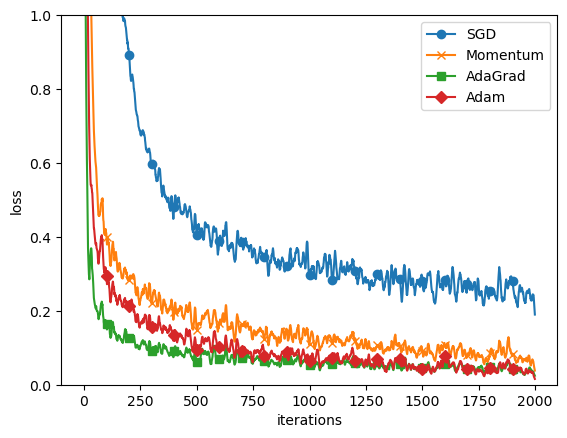

In [2]:
# coding: utf-8
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from dataset.mnist import load_mnist
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key],
        markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
